In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [27]:
!ls


'quotes_dataset (1).csv'   sample_data	 WINWORD.EXE


In [28]:
df = pd.read_csv('quotes_dataset (1).csv')
df.head()


,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


### Questions Before Analysis

1. How many rows and columns are in the dataset?
2. What are the data types of each feature?
3. Are there missing or null values?
4. Are there duplicate records?
5. Which columns are numerical and categorical?
6. Are there any outliers in numerical columns?
7. Are there relationships between variables?


In [29]:
df.shape
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quote   10 non-null     object
 1   Author  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


In [30]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [31]:
df = df.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-3283324713.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [32]:
df.dtypes


,0
Quote,object
Author,object


In [33]:
num_df = df.select_dtypes(include=np.number)

if num_df.empty:
    print("No numerical columns found.")
else:
    num_df.hist()
    plt.show()


No numerical columns found.


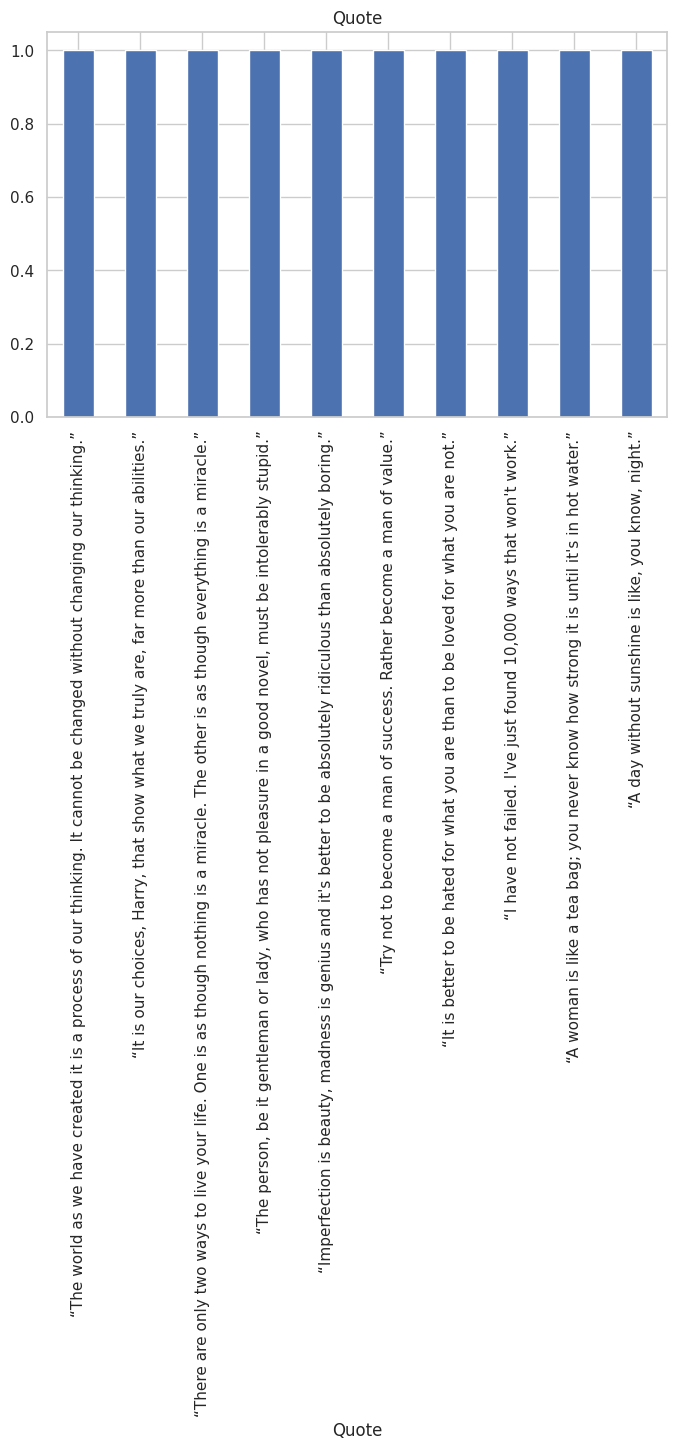

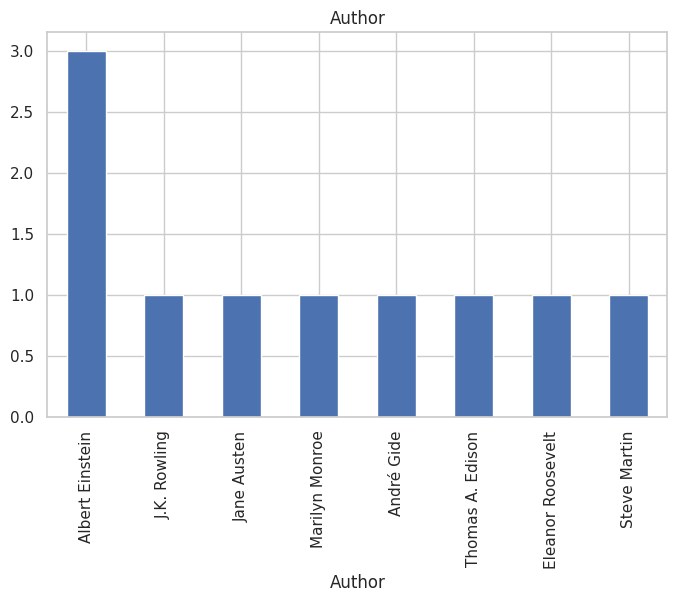

In [34]:
cat_df = df.select_dtypes(include='object')

if cat_df.empty:
    print("No categorical columns found.")
else:
    for col in cat_df.columns:
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(col)
        plt.show()


In [35]:
if num_df.shape[1] > 1:
    sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numerical columns for correlation.")


Not enough numerical columns for correlation.


In [36]:
for col in num_df.columns:
    sns.boxplot(x=num_df[col])
    plt.title(col)
    plt.show()


### Key Insights

- Dataset size and structure were analyzed.
- Data type issues were identified and corrected.
- Missing values and duplicates were checked.
- Numerical distributions and categorical frequencies were visualized.
- Correlation and outliers were identified.
